In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import bonsaiana
from tqdm.notebook import tqdm
from patternSpeed import FourierMethod

In [2]:
DATA_DIR = '/path/to/bonsai/snapshots'
N_START = 300
N_END = 1600

# Fujii et al. (2019) MWa

In [3]:
df = pd.read_csv('pattern_speed_f19MWa.csv')

In [4]:
dt = 9.778e-3 #Gyr = kpc/(100 km/s)
df['t'] = df['tid']*dt

In [5]:
df['Om_fd'] = df['psi_fd'].diff()
df['Om_fd'] = df['Om_fd'].apply(lambda x: [x, x+np.pi, x-np.pi][np.argmin([np.abs(x),
                                                                           np.abs(x+np.pi),
                                                                           np.abs(x-np.pi)])])

df['Om_fd'] *= 100

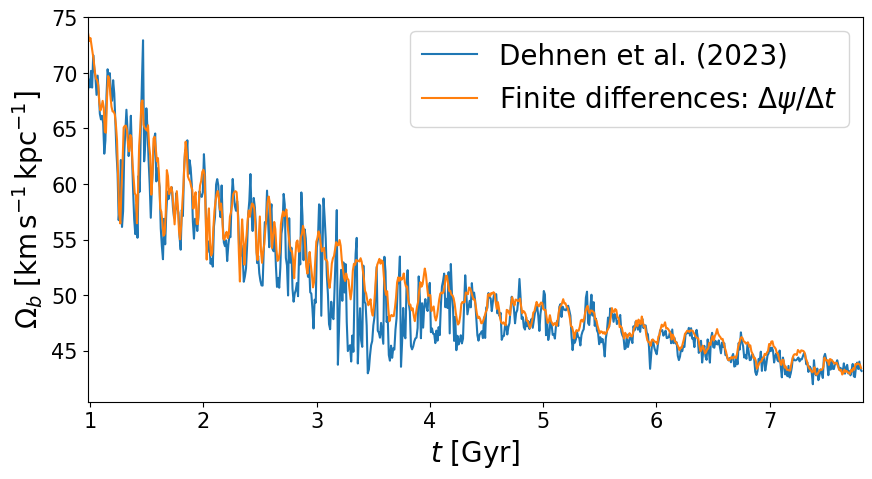

In [6]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
ax.plot(df['t'], df['Om'], label='Dehnen et al. (2023)')
ax.plot(df['t']-0.5*dt, df['Om_fd'], label=r'Finite differences: $\Delta \psi/\Delta t$')
ax.legend(fontsize=20)
ax.set_xlim(100*dt, 800*dt)
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$\Omega_b\; [\mathrm{km \, s^{-1} \, kpc^{-1}}]$', fontsize=20)
ax.tick_params(labelsize=15)

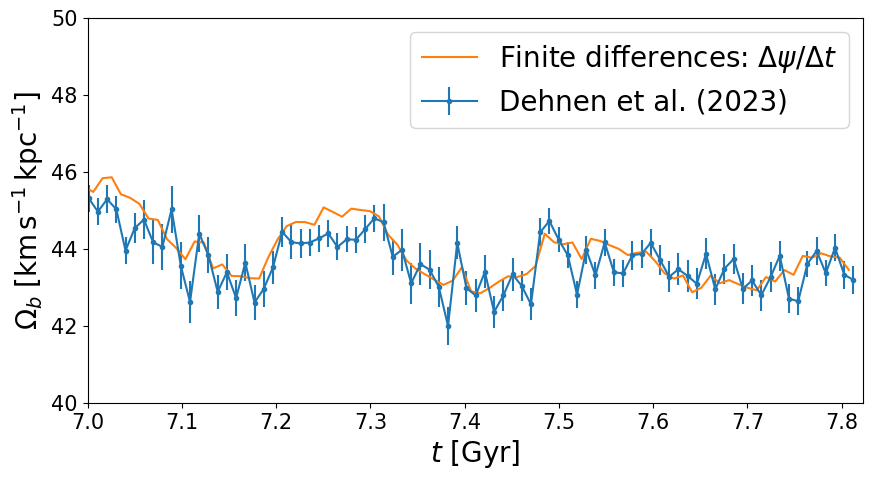

In [7]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
ax.errorbar(df['t'], df['Om'], df['Om_e'],  ls='-', fmt='.', label='Dehnen et al. (2023)')
ax.plot(df['t']-0.5*dt, df['Om_fd'], label=r'Finite differences: $\Delta \psi/\Delta t$')
ax.legend(fontsize=20)
ax.set_xlim(7, 800*dt)
ax.set_ylim(40, 50)
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$\Omega_b\; [\mathrm{km \, s^{-1} \, kpc^{-1}}]$', fontsize=20)
ax.tick_params(labelsize=15)

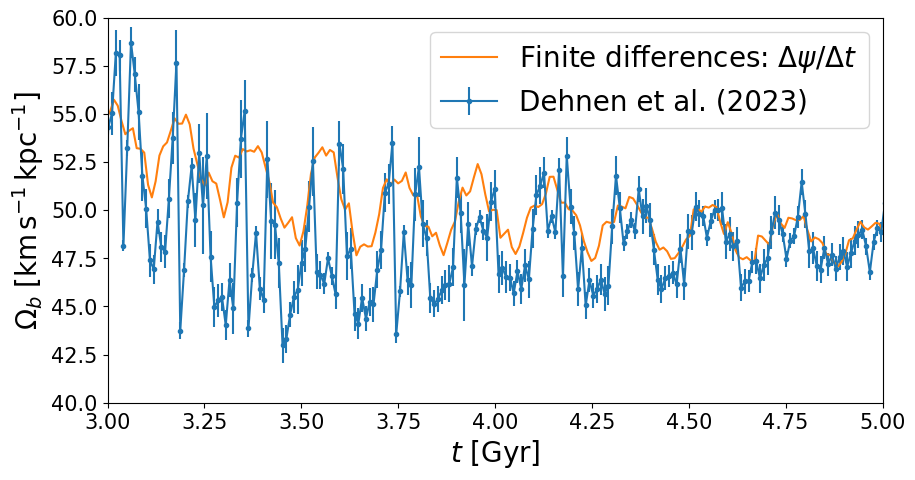

In [8]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
ax.errorbar(df['t'], df['Om'], df['Om_e'], ls='-', fmt='.', label='Dehnen et al. (2023)')
ax.plot(df['t']-0.5*dt, df['Om_fd'], label=r'Finite differences: $\Delta \psi/\Delta t$')
ax.legend(fontsize=20)
ax.set_xlim(3, 5)
ax.set_ylim(40, 60)
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$\Omega_b\; [\mathrm{km \, s^{-1} \, kpc^{-1}}]$', fontsize=20)
ax.tick_params(labelsize=15)

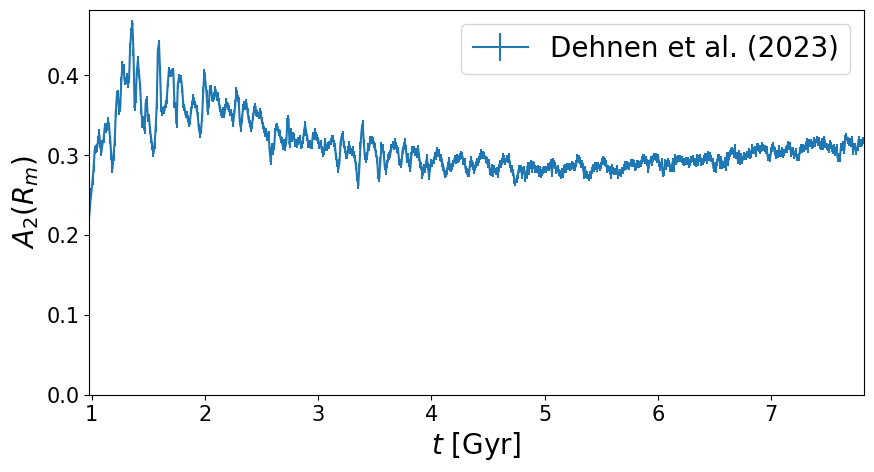

In [178]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
ax.errorbar(df['t'], df['A2'], df['A2_e'], label='Dehnen et al. (2023)')
ax.legend(fontsize=20)
ax.set_xlim(100*dt, 800*dt)
ax.set_ylim(0)
ax.set_xlabel(r'$t$ [Gyr]', fontsize=20)
ax.set_ylabel(r'$A_2(R_m)$', fontsize=20)
ax.tick_params(labelsize=15)

In [246]:
n = 332
ids, types, mass, pos, vel = bonsaiana.IO.read(f'{DATA_DIR}/SNAP_{n:05d}.0000.bonsai', reduce_star=1)
pos = np.float64(pos)
vel = np.float64(vel)
pos -= pos.mean(axis=0)
R = np.sqrt(pos[:, 0]**2 + pos[:, 1]**2)
phi = np.arctan2(pos[(R>1) & (R<3)][:, 1],
                 pos[(R>1) & (R<3)][:, 0])

In [248]:
fm = FourierMethod(pos[:, 0], pos[:, 1], vel[:, 0], vel[:, 1])
df_diskana = fm.analyseDisc()

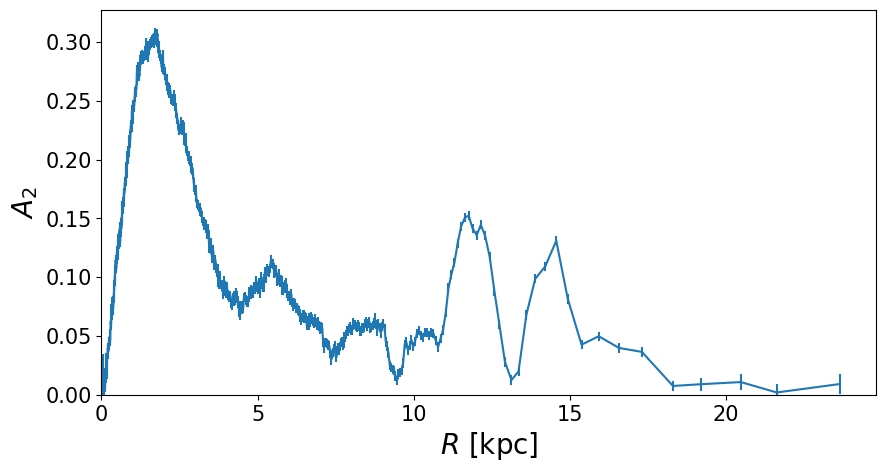

In [270]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
ax.errorbar(df_diskana['R'], df_diskana['A2'], df_diskana['A2_e'])
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel(r'$R$ [kpc]', fontsize=20)
ax.set_ylabel(r'$A_2$', fontsize=20)
ax.tick_params(labelsize=15)

Text(0, 0.5, '$A_2$')

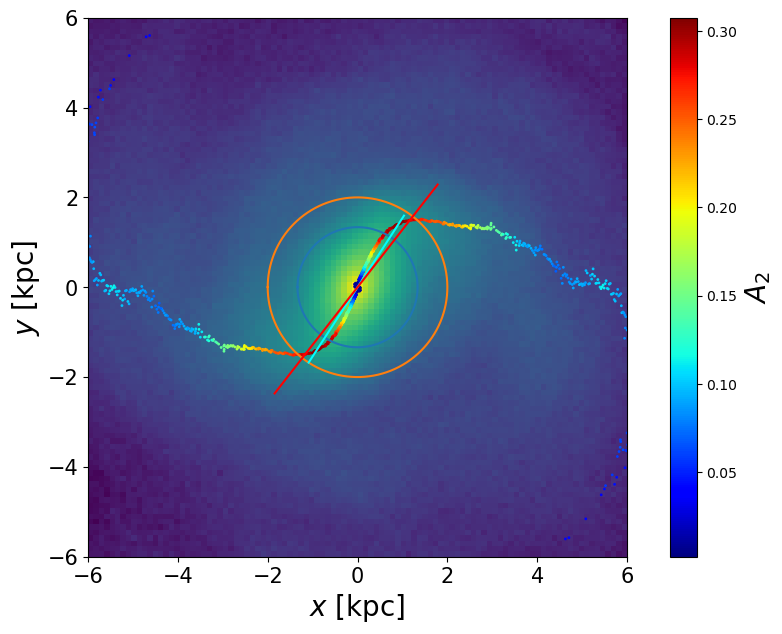

In [273]:
fig = plt.figure(figsize=[11,7])
ax = fig.add_subplot(111)
ax.hist2d(pos[:, 0],
          pos[:, 1],
          range=[[-6, 6], [-6, 6]],
          bins=[100, 100],
          norm=mpl.colors.LogNorm())
ax.set_aspect(1)
phis = np.arange(-np.pi, np.pi, 0.01)
R0 = df[df['tid']==n]['R0'].values[0]
R1 = df[df['tid']==n]['R1'].values[0]
psi = df[df['tid']==n]['psi'].values[0]
psi_fd = df[df['tid']==n]['psi_fd'].values[0]
ax.plot(R0*np.cos(phis),
        R0*np.sin(phis))
ax.plot(R1*np.cos(phis),
        R1*np.sin(phis))
ax.plot(np.arange(-R1, R1, 0.1)*np.cos(psi),
        np.arange(-R1, R1, 0.1)*np.sin(psi),
        color='cyan', 
       )
ax.plot(np.arange(-3, 3, 0.1)*np.cos(psi_fd),
        np.arange(-3, 3, 0.1)*np.sin(psi_fd),
        color='red'
       )
ax.scatter(df_diskana['R']*np.cos(df_diskana['ps2']),
           df_diskana['R']*np.sin(df_diskana['ps2']),
           c=df_diskana['A2'],
           cmap=mpl.cm.jet, s=1
          )
mpbl = ax.scatter(df_diskana['R']*np.cos(df_diskana['ps2']+np.pi),
           df_diskana['R']*np.sin(df_diskana['ps2']+np.pi),
           c=df_diskana['A2'],
           cmap=mpl.cm.jet, s=1
          )


ax.set_xlabel(r'$x$ [kpc]', fontsize=20)
ax.set_ylabel(r'$y$ [kpc]', fontsize=20)
ax.tick_params(labelsize=15)

cb = fig.colorbar(mappable=mpbl, ax=ax)
cb.ax.set_ylabel('$A_2$', fontsize=20)